In [1501]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [1502]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Sobre Obesidade

## Abrindo o DataSet Obesidade

In [1503]:
df_obesidade = pd.read_csv('/content/drive/MyDrive/DataSetADBD/obesidade-limpo.csv', sep = ',', index_col='Unnamed: 0')
df_obesidade

,Country,Year,Obesity (%),Sex
0,Afghanistan,1975,0.5 [0.2-1.1],Both sexes
1,Afghanistan,1975,0.2 [0.0-0.6],Male
2,Afghanistan,1975,0.8 [0.2-2.0],Female
3,Afghanistan,1976,0.5 [0.2-1.1],Both sexes
4,Afghanistan,1976,0.2 [0.0-0.7],Male
...,...,...,...,...
24565,Zimbabwe,2015,4.5 [2.4-7.6],Male
24566,Zimbabwe,2015,24.8 [18.9-31.3],Female
24567,Zimbabwe,2016,15.5 [12.0-19.2],Both sexes
24568,Zimbabwe,2016,4.7 [2.5-8.0],Male


## Filtre as informações corretas para apresentar os resultados de obesidade.

In [1504]:
df_obesidade

,Country,Year,Obesity (%),Sex
0,Afghanistan,1975,0.5 [0.2-1.1],Both sexes
1,Afghanistan,1975,0.2 [0.0-0.6],Male
2,Afghanistan,1975,0.8 [0.2-2.0],Female
3,Afghanistan,1976,0.5 [0.2-1.1],Both sexes
4,Afghanistan,1976,0.2 [0.0-0.7],Male
...,...,...,...,...
24565,Zimbabwe,2015,4.5 [2.4-7.6],Male
24566,Zimbabwe,2015,24.8 [18.9-31.3],Female
24567,Zimbabwe,2016,15.5 [12.0-19.2],Both sexes
24568,Zimbabwe,2016,4.7 [2.5-8.0],Male


## Os dados entre homens mulheres são parecidos? Informe com números.

In [1505]:
# Extrair os três primeiros caracteres da coluna 'Obesity (%)' e converter para float
df_obesidade['Obesity no interval'] = pd.to_numeric(df_obesidade['Obesity (%)'].str.extract(r'(\d+\.\d+|\d+)')[0], errors='coerce')
'''
Regex para extração: A expressão regular r'(\d+\.\d+|\d+)' captura qualquer sequência de dígitos que pode ter ou não um ponto decimal. Ela funciona assim:

\d+: captura um ou mais dígitos.
\.: captura um ponto literal.
(\d+\.\d+|\d+): captura uma sequência de dígitos que pode ou não ter um ponto decimal.
'''
df_obesidade

,Country,Year,Obesity (%),Sex,Obesity no interval
0,Afghanistan,1975,0.5 [0.2-1.1],Both sexes,0.5
1,Afghanistan,1975,0.2 [0.0-0.6],Male,0.2
2,Afghanistan,1975,0.8 [0.2-2.0],Female,0.8
3,Afghanistan,1976,0.5 [0.2-1.1],Both sexes,0.5
4,Afghanistan,1976,0.2 [0.0-0.7],Male,0.2
...,...,...,...,...,...
24565,Zimbabwe,2015,4.5 [2.4-7.6],Male,4.5
24566,Zimbabwe,2015,24.8 [18.9-31.3],Female,24.8
24567,Zimbabwe,2016,15.5 [12.0-19.2],Both sexes,15.5
24568,Zimbabwe,2016,4.7 [2.5-8.0],Male,4.7


In [1506]:
df_obesidade[pd.isna(df_obesidade['Obesity no interval'])]

,Country,Year,Obesity (%),Sex,Obesity no interval
14112,Monaco,1975,No data,Both sexes,NaN
14113,Monaco,1975,No data,Male,NaN
14114,Monaco,1975,No data,Female,NaN
14115,Monaco,1976,No data,Both sexes,NaN
14116,Monaco,1976,No data,Male,NaN
...,...,...,...,...,...
20911,Sudan,2015,No data,Male,NaN
20912,Sudan,2015,No data,Female,NaN
20913,Sudan,2016,No data,Both sexes,NaN
20914,Sudan,2016,No data,Male,NaN


In [1507]:
# Remover registros com NaN em 'Obesity no interval'
df_obesidade.dropna(subset=['Obesity no interval'])

,Country,Year,Obesity (%),Sex,Obesity no interval
0,Afghanistan,1975,0.5 [0.2-1.1],Both sexes,0.5
1,Afghanistan,1975,0.2 [0.0-0.6],Male,0.2
2,Afghanistan,1975,0.8 [0.2-2.0],Female,0.8
3,Afghanistan,1976,0.5 [0.2-1.1],Both sexes,0.5
4,Afghanistan,1976,0.2 [0.0-0.7],Male,0.2
...,...,...,...,...,...
24565,Zimbabwe,2015,4.5 [2.4-7.6],Male,4.5
24566,Zimbabwe,2015,24.8 [18.9-31.3],Female,24.8
24567,Zimbabwe,2016,15.5 [12.0-19.2],Both sexes,15.5
24568,Zimbabwe,2016,4.7 [2.5-8.0],Male,4.7


In [1508]:
# Filtrar o DataFrame para incluir apenas as linhas onde a coluna "Sex" é igual a "Male"
male_df = df_obesidade[df_obesidade['Sex'] == 'Male']

# Calcular a média da coluna "Obesity no interval" para os valores filtrados
media_porc_obesidade_homem = male_df['Obesity no interval'].mean()
print("Media de obesidade de homens: {}".format(media_porc_obesidade_homem))

Media de obesidade de homens: 9.332984293193716


In [1509]:
# Filtrar o DataFrame para incluir apenas as linhas onde a coluna "Sex" é igual a "Male"
female_df = df_obesidade[df_obesidade['Sex'] == 'Female']

# Calcular a média da coluna "Obesity no interval" para os valores filtrados
media_porc_obesidade_mulher = female_df['Obesity no interval'].mean()
print("Media de obesidade de mulheres: {}".format(media_porc_obesidade_mulher))

Media de obesidade de mulheres: 15.533433059087509


In [1510]:
df_obesidade[df_obesidade['Sex'] == 'Male'].describe()['Obesity no interval']

count    8022.000000
mean        9.332984
std         8.981006
min         0.100000
25%         2.100000
50%         7.000000
75%        14.200000
max        58.700000
Name: Obesity no interval, dtype: float64

In [1511]:
df_obesidade[df_obesidade['Sex'] == 'Female'].describe()['Obesity no interval']

count    8022.000000
mean       15.533433
std        11.316294
min         0.200000
25%         6.600000
50%        14.000000
75%        21.475000
max        63.300000
Name: Obesity no interval, dtype: float64

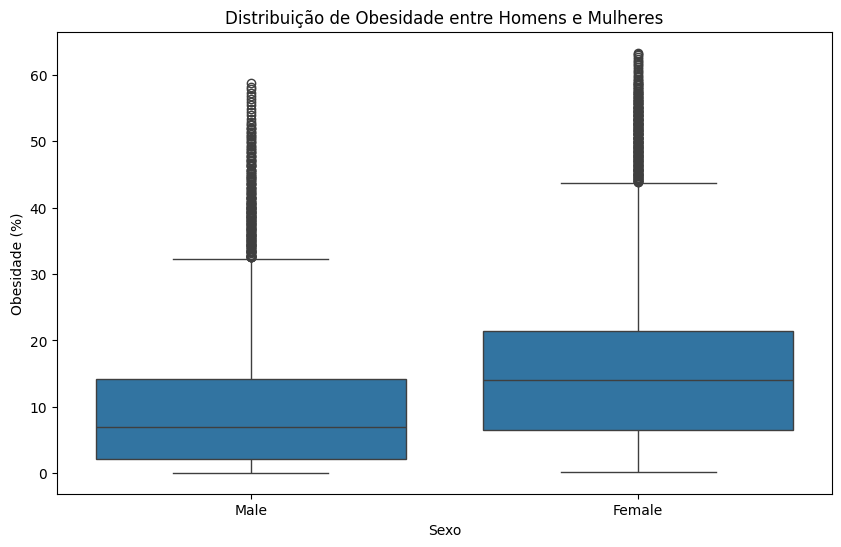

In [1512]:
# Vamos criar DataFrames para os dados de homens e mulheres
male_df = pd.DataFrame({
    'Sex': 'Male',
    'Obesity': male_df['Obesity no interval']
})
female_df = pd.DataFrame({
    'Sex': 'Female',
    'Obesity': female_df['Obesity no interval']
})

# Concatenar os DataFrames de homens e mulheres
combined_df = pd.concat([male_df, female_df])

# Plotar o boxplot usando Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sex', y='Obesity', data=combined_df)
plt.title('Distribuição de Obesidade entre Homens e Mulheres')
plt.xlabel('Sexo')
plt.ylabel('Obesidade (%)')
plt.show()

R: Percebe-se que os dados entre homens e mulhereres são diferentes. Há um maior percentual geral de mulheres obesas do que homens.

## Qual o percentual médio de obesidade por sexo na américa do norte no ano de 2010?

In [1513]:
df_obesidade['Country'].unique() #lista de países

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica',
       'Croatia', 'Cuba', 'Cyprus', 'Czechia', "Côte d'Ivoire",
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia

In [1514]:
exp_logica_america_norte = (df_obesidade['Country'] == 'United States of America') | \
                            (df_obesidade['Country'] == 'Canada') | \
                            (df_obesidade['Country'] == 'Mexico')
df_america_norte = df_obesidade[exp_logica_america_norte]
df_america_norte

,Country,Year,Obesity (%),Sex,Obesity no interval
3906,Canada,1975,9.8 [7.2-13.0],Both sexes,9.8
3907,Canada,1975,8.8 [5.3-13.2],Male,8.8
3908,Canada,1975,10.8 [7.0-15.2],Female,10.8
3909,Canada,1976,10.1 [7.6-13.1],Both sexes,10.1
3910,Canada,1976,9.1 [5.7-13.3],Male,9.1
...,...,...,...,...,...
23557,United States of America,2015,34.7 [29.7-40.1],Male,34.7
23558,United States of America,2015,36.4 [31.3-41.4],Female,36.4
23559,United States of America,2016,36.2 [32.3-40.1],Both sexes,36.2
23560,United States of America,2016,35.5 [30.0-41.2],Male,35.5


In [1515]:
df_america_norte_2010 = df_america_norte[df_america_norte['Year'] == 2010]
df_america_norte_2010

,Country,Year,Obesity (%),Sex,Obesity no interval
4011,Canada,2010,26.0 [23.2-28.9],Both sexes,26.0
4012,Canada,2010,25.8 [21.8-30.1],Male,25.8
4013,Canada,2010,26.2 [22.4-30.2],Female,26.2
13965,Mexico,2010,25.8 [23.1-28.6],Both sexes,25.8
13966,Mexico,2010,21.1 [17.5-25.0],Male,21.1
13967,Mexico,2010,29.8 [25.8-33.9],Female,29.8
23541,United States of America,2010,32.3 [29.6-35.1],Both sexes,32.3
23542,United States of America,2010,31.2 [27.4-35.3],Male,31.2
23543,United States of America,2010,33.3 [29.6-37.1],Female,33.3


In [1516]:
df_america_norte_2010_homens = df_america_norte_2010[df_america_norte_2010['Sex'] == 'Male']
df_america_norte_2010_homens

,Country,Year,Obesity (%),Sex,Obesity no interval
4012,Canada,2010,25.8 [21.8-30.1],Male,25.8
13966,Mexico,2010,21.1 [17.5-25.0],Male,21.1
23542,United States of America,2010,31.2 [27.4-35.3],Male,31.2


In [1517]:
df_america_norte_2010_mulheres = df_america_norte_2010[df_america_norte_2010['Sex'] == 'Female']
df_america_norte_2010_mulheres

,Country,Year,Obesity (%),Sex,Obesity no interval
4013,Canada,2010,26.2 [22.4-30.2],Female,26.2
13967,Mexico,2010,29.8 [25.8-33.9],Female,29.8
23543,United States of America,2010,33.3 [29.6-37.1],Female,33.3


In [1518]:
print('O percentual médio de homens obesos na América do Norte, em 2010, é {:.2f}%\n'.format(df_america_norte_2010_homens['Obesity no interval'].mean()))
print('O percentual médio de mulheres obesas na América do Norte, em 2010, é {:.2f}%'.format(df_america_norte_2010_mulheres['Obesity no interval'].mean()))

if abs(df_america_norte_2010_homens['Obesity no interval'].mean() - df_america_norte_2010_mulheres['Obesity no interval'].mean()) < 5:
  print('\nOs percentuais são próximos')
else:
  print('\nOs percentuais são distantes')


O percentual médio de homens obesos na América do Norte, em 2010, é 26.03%

O percentual médio de mulheres obesas na América do Norte, em 2010, é 29.77%

Os percentuais são próximos


## Qual os top 3 com maior e menor taxa de aumento de índices de obesidade nesse período de 2010? E em 2016?

In [1519]:
# Filtrando os dados para incluir apenas os anos de 2010 e 2016
df_2010 = df_obesidade[df_obesidade['Year'] == 2010]
df_2016 = df_obesidade[df_obesidade['Year'] == 2016]

# Calculando a média de obesidade para cada país em 2010 e 2016
media_obesidade_2010 = df_2010.groupby('Country')['Obesity no interval'].mean()
media_obesidade_2016 = df_2016.groupby('Country')['Obesity no interval'].mean()

# Calculando a diferença entre as médias de obesidade em 2016 e 2010 para cada país
taxa_aumento = media_obesidade_2016 - media_obesidade_2010

# Ordenando os países pela taxa de aumento em 2010 e 2016
top3_maior_aumento_2010 = taxa_aumento.nlargest(3)
top3_menor_aumento_2010 = taxa_aumento.nsmallest(3)

# Exibindo os resultados para 2010
print("Top 3 com maior taxa de aumento de índices de obesidade em 2010:")
print(top3_maior_aumento_2010)
print("\nTop 3 com menor taxa de aumento de índices de obesidade em 2010:")
print(top3_menor_aumento_2010)

# Repetindo o processo para 2016
taxa_aumento_2016 = media_obesidade_2016 - media_obesidade_2010
top3_maior_aumento_2016 = taxa_aumento_2016.nlargest(3)
top3_menor_aumento_2016 = taxa_aumento_2016.nsmallest(3)

# Exibindo os resultados para 2016
print("\nTop 3 com maior taxa de aumento de índices de obesidade em 2016:")
print(top3_maior_aumento_2016)
print("\nTop 3 com menor taxa de aumento de índices de obesidade em 2016:")
print(top3_menor_aumento_2016)

Top 3 com maior taxa de aumento de índices de obesidade em 2010:
Country
Haiti                 4.933333
Niue                  4.733333
Dominican Republic    4.633333
Name: Obesity no interval, dtype: float64

Top 3 com menor taxa de aumento de índices de obesidade em 2010:
Country
Singapore            0.700000
Viet Nam             0.766667
Republic of Korea    0.766667
Name: Obesity no interval, dtype: float64

Top 3 com maior taxa de aumento de índices de obesidade em 2016:
Country
Haiti                 4.933333
Niue                  4.733333
Dominican Republic    4.633333
Name: Obesity no interval, dtype: float64

Top 3 com menor taxa de aumento de índices de obesidade em 2016:
Country
Singapore            0.700000
Viet Nam             0.766667
Republic of Korea    0.766667
Name: Obesity no interval, dtype: float64


In [1520]:
df_2010

,Country,Year,Obesity (%),Sex,Obesity no interval
105,Afghanistan,2010,4.0 [2.5-5.9],Both sexes,4.0
106,Afghanistan,2010,2.2 [1.0-4.4],Male,2.2
107,Afghanistan,2010,5.7 [3.3-9.2],Female,5.7
231,Albania,2010,18.2 [14.3-22.3],Both sexes,18.2
232,Albania,2010,17.4 [12.0-23.7],Male,17.4
...,...,...,...,...,...
24424,Zambia,2010,2.6 [1.2-4.6],Male,2.6
24425,Zambia,2010,9.8 [6.9-13.3],Female,9.8
24549,Zimbabwe,2010,13.8 [11.0-16.8],Both sexes,13.8
24550,Zimbabwe,2010,3.7 [2.1-6.1],Male,3.7


## E os top 3 com maior e menor taxa de aumento de índices de obesidade no período completo, até o último registro ?

Passos exeutados:

1. **Filtrar os dados para incluir apenas registros onde `Sex` é "Both Sexes"**.
2. **Calcular a diferença na obesidade (%) entre o primeiro e o último ano disponível para cada país**.
3. **Classificar os países com base nessa diferença**.
4. **Selecionar os top 3 países com o maior e menor aumento na obesidade (%)**.

In [1521]:
# Filtrar os dados para incluir apenas registros onde 'Sex' é "Both Sexes"
df_obesidade_both_sexes = df_obesidade[df_obesidade['Sex'] == 'Both sexes'].copy()

In [1522]:
# Verificar se há dados após filtragem e limpeza
print(f"Total de registros após filtragem: {len(df_obesidade_both_sexes)}")

Total de registros após filtragem: 8190


In [1523]:
# Remover registros com NaN em 'Obesity no interval'
df_obesidade_both_sexes = df_obesidade_both_sexes.dropna(subset=['Obesity no interval'])

In [1524]:
# Obter o primeiro e o último ano para cada país
first_last_years = df_obesidade_both_sexes.groupby('Country')['Year'].agg(['min', 'max']).reset_index()

In [1525]:
# Mesclar com o dataframe original para obter as taxas de obesidade nos primeiros e últimos anos
first_year_data = pd.merge(df_obesidade_both_sexes, first_last_years[['Country', 'min']], left_on=['Country', 'Year'], right_on=['Country', 'min'])
last_year_data = pd.merge(df_obesidade_both_sexes, first_last_years[['Country', 'max']], left_on=['Country', 'Year'], right_on=['Country', 'max'])

In [1526]:
# Renomear colunas para facilitar a manipulação
first_year_data = first_year_data.rename(columns={'Obesity no interval': 'Obesity First Year', 'min': 'First Year'})
last_year_data = last_year_data.rename(columns={'Obesity no interval': 'Obesity Last Year', 'max': 'Last Year'})

In [1527]:
# Mesclar os dados de primeiro e último ano
combined_data = pd.merge(first_year_data[['Country', 'First Year', 'Obesity First Year']],
                         last_year_data[['Country', 'Last Year', 'Obesity Last Year']],
                         on='Country')

In [1528]:
# Calcular a diferença na obesidade
combined_data['Obesity Increase'] = combined_data['Obesity Last Year'] - combined_data['Obesity First Year']

In [1529]:
# Verificar os dados combinados
print(combined_data.head())

       Country  First Year  Obesity First Year  Last Year  Obesity Last Year  \
0  Afghanistan        1975                 0.5       2016                5.5   
1      Albania        1975                 6.5       2016               21.7   
2      Algeria        1975                 6.9       2016               27.4   
3      Andorra        1975                12.9       2016               25.6   
4       Angola        1975                 0.8       2016                8.2   

   Obesity Increase  
0               5.0  
1              15.2  
2              20.5  
3              12.7  
4               7.4  


In [1530]:
# Classificar os países com base no aumento da obesidade
combined_data = combined_data.sort_values(by='Obesity Increase', ascending=False)

In [1531]:
# Top 3 países com maior aumento
top_3_increase = combined_data.head(3)

# Top 3 países com menor aumento (ou maior diminuição)
top_3_decrease = combined_data.tail(3)

In [1532]:
print("Top 3 países com maior aumento de obesidade:")
print(top_3_increase[['Country', 'First Year', 'Last Year', 'Obesity First Year', 'Obesity Last Year', 'Obesity Increase']])

print("\nTop 3 países com menor aumento (ou maior diminuição) de obesidade:")
print(top_3_decrease[['Country', 'First Year', 'Last Year', 'Obesity First Year', 'Obesity Last Year', 'Obesity Increase']])


Top 3 países com maior aumento de obesidade:
      Country  First Year  Last Year  Obesity First Year  Obesity Last Year  \
176    Tuvalu        1975       2016                17.9               51.6   
125      Niue        1975       2016                18.9               50.0   
90   Kiribati        1975       2016                15.9               46.0   

     Obesity Increase  
176              33.7  
125              31.1  
90               30.1  

Top 3 países com menor aumento (ou maior diminuição) de obesidade:
       Country  First Year  Last Year  Obesity First Year  Obesity Last Year  \
86       Japan        1975       2016                 1.0                4.3   
154  Singapore        1975       2016                 3.0                6.1   
187   Viet Nam        1975       2016                 0.1                2.1   

     Obesity Increase  
86                3.3  
154               3.1  
187               2.0  


## Extraia o máximo de informação possível sobre o Brasil. (O que julga ser importante sobre esse dataset? Use gráficos e apresente.)

In [1533]:
df_brasil = df_obesidade[df_obesidade['Country'] == 'Brazil']
print('Dados sobre o Brasil:\n\n{}'.format(df_brasil))

df_brasil_male = df_obesidade[(df_obesidade['Country'] == 'Brazil') & (df_obesidade['Sex'] == 'Male')] #Dados dos homens
df_brasil_female = df_obesidade[(df_obesidade['Country'] == 'Brazil') & (df_obesidade['Sex'] == 'Female')] #Dados das mulheres

Dados sobre o Brasil:

     Country  Year       Obesity (%)         Sex  Obesity no interval
2898  Brazil  1975     5.2 [3.3-7.9]  Both sexes                  5.2
2899  Brazil  1975     3.0 [1.4-5.7]        Male                  3.0
2900  Brazil  1975    7.3 [4.0-12.0]      Female                  7.3
2901  Brazil  1976     5.5 [3.5-8.1]  Both sexes                  5.5
2902  Brazil  1976     3.2 [1.5-5.8]        Male                  3.2
...      ...   ...               ...         ...                  ...
3019  Brazil  2015  18.0 [13.9-22.6]        Male                 18.0
3020  Brazil  2015  24.9 [20.3-29.8]      Female                 24.9
3021  Brazil  2016  22.1 [18.7-25.7]  Both sexes                 22.1
3022  Brazil  2016  18.5 [14.1-23.5]        Male                 18.5
3023  Brazil  2016  25.4 [20.4-30.7]      Female                 25.4

[126 rows x 5 columns]


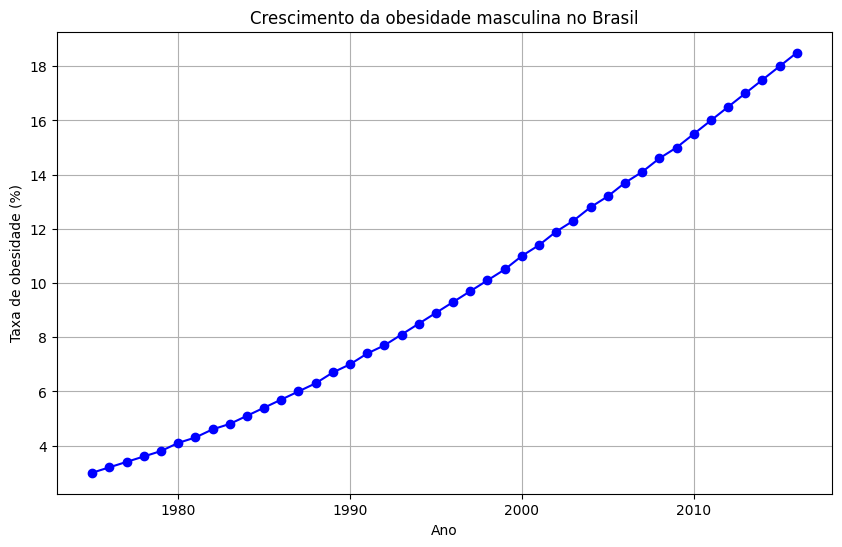

In [1534]:
## Plotando um gráfico sobre o crescimento da obesidade masculina no Brasil

# Ordenar os dados pelo ano
df_brasil_male = df_brasil_male.sort_values('Year')

# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(df_brasil_male['Year'], df_brasil_male['Obesity no interval'], marker='o', color='b')
plt.title('Crescimento da obesidade masculina no Brasil')
plt.xlabel('Ano')
plt.ylabel('Taxa de obesidade (%)')
plt.grid(True)
plt.show()

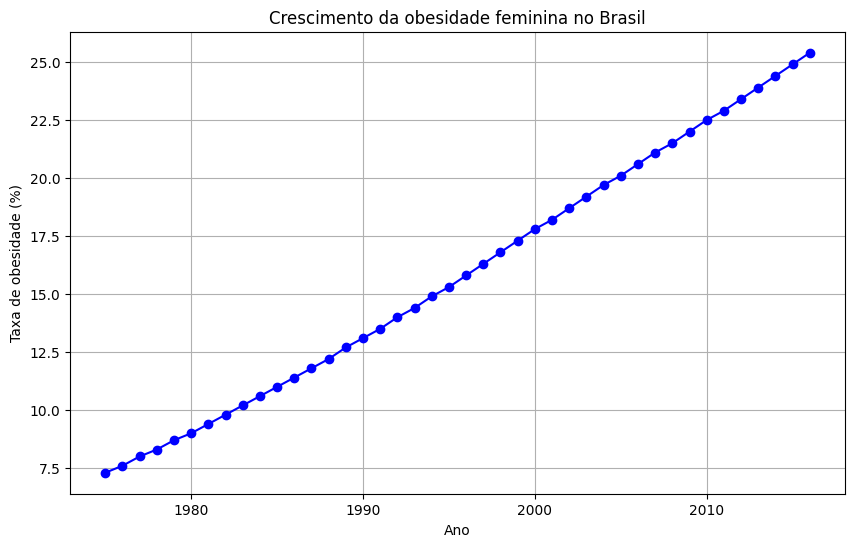

In [1535]:
## Plotando um gráfico sobre o crescimento da obesidade masculina no Brasil

# Ordenar os dados pelo ano
df_brasil_female = df_brasil_female.sort_values('Year')

# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(df_brasil_female['Year'], df_brasil_female['Obesity no interval'], marker='o', color='b')
plt.title('Crescimento da obesidade feminina no Brasil')
plt.xlabel('Ano')
plt.ylabel('Taxa de obesidade (%)')
plt.grid(True)
plt.show()

In [1536]:
print('Alguns cálculos estatísticos sobre obesidade no Brasil:\n\n{}'.format(df_brasil['Obesity no interval'].describe()))

Alguns cálculos estatísticos sobre obesidade no Brasil:

count    126.000000
mean      12.801587
std        5.705927
min        3.000000
25%        8.150000
50%       12.250000
75%       17.225000
max       25.400000
Name: Obesity no interval, dtype: float64


### Comparar a obesidade no Brasil com o restante do mundo

Este código plota um gráfico comparativo das médias de obesidade ao longo do tempo para o Brasil em azul e para os outros países (excluindo o Brasil) em vermelho.

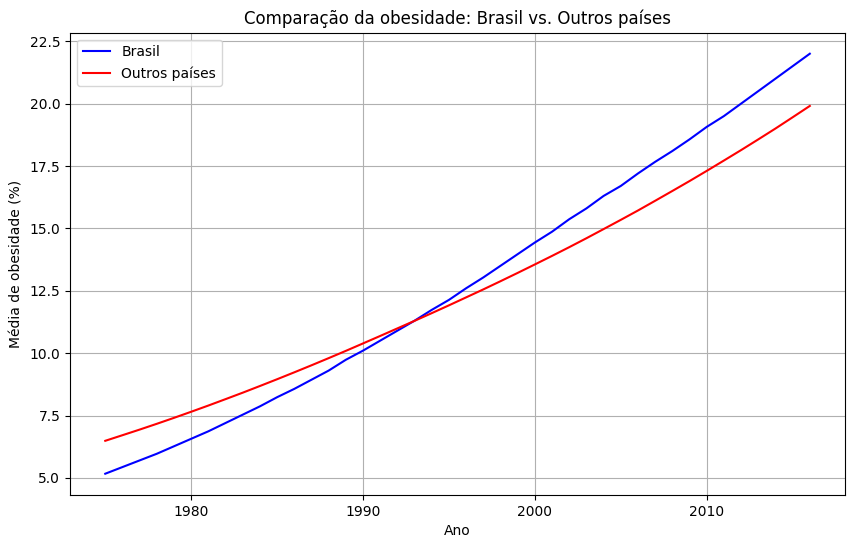

In [1537]:
# Calcular a média da obesidade para cada ano no Brasil
media_obesidade_brasil = df_brasil.groupby('Year')['Obesity no interval'].mean()

# Filtrar os dados para incluir apenas os registros de outros países (excluindo o Brasil)
df_outros_paises = df_obesidade[df_obesidade['Country'] != 'Brazil']

# Calcular a média da obesidade para cada ano nos outros países
media_obesidade_outros_paises = df_outros_paises.groupby('Year')['Obesity no interval'].mean()

# Plotar os gráficos comparativos das médias de obesidade ao longo do tempo
plt.figure(figsize=(10, 6))
plt.plot(media_obesidade_brasil.index, media_obesidade_brasil, label='Brasil', color='blue')
plt.plot(media_obesidade_outros_paises.index, media_obesidade_outros_paises, label='Outros países', color='red')
plt.title('Comparação da obesidade: Brasil vs. Outros países')
plt.xlabel('Ano')
plt.ylabel('Média de obesidade (%)')
plt.legend()
plt.grid(True)
plt.show()


Agora, há um interesse em saber quando o Brasil esteve abaixo da média mundial e acima da média mundial. O código a seguir visa resolver esse problema.

In [1538]:
# 1. Calcule a média mundial de obesidade para cada ano
media_obesidade_mundial = df_obesidade.groupby('Year')['Obesity no interval'].mean()

# 2. Calcule a média de obesidade para o Brasil para cada ano
media_obesidade_brasil = df_brasil.groupby('Year')['Obesity no interval'].mean()

# 3. Compare a média de obesidade do Brasil com a média mundial para cada ano
diferenca_obesidade = media_obesidade_brasil - media_obesidade_mundial

# 4. Identifique os anos em que a média de obesidade do Brasil está acima e abaixo da média mundial
anos_acima_media = diferenca_obesidade[diferenca_obesidade > 0].index
anos_abaixo_media = diferenca_obesidade[diferenca_obesidade < 0].index

# 5. Encontre o intervalo de anos em que o Brasil está acima e abaixo da média mundial
intervalo_acima_media = (anos_acima_media.min(), anos_acima_media.max())
intervalo_abaixo_media = (anos_abaixo_media.min(), anos_abaixo_media.max())

print("Intervalo em que o Brasil está acima da média mundial de obesidade:", intervalo_acima_media)
print("Intervalo em que o Brasil está abaixo da média mundial de obesidade:", intervalo_abaixo_media)


Intervalo em que o Brasil está acima da média mundial de obesidade: (1993, 2016)
Intervalo em que o Brasil está abaixo da média mundial de obesidade: (1975, 1992)


### Um aspecto adicional: previsão para obesos em 2023 usando regressão linear.

In [1539]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Dados históricos de obesidade no Brasil
anos_hist = np.array(df_brasil['Year']).reshape(-1, 1)  # Anos como matriz de uma coluna
obesidade_hist = np.array(df_brasil['Obesity no interval'])  # Taxa de obesidade

# Ajustar um modelo de regressão linear aos dados históricos
modelo = LinearRegression()
modelo.fit(anos_hist, obesidade_hist)

# Prever a taxa de obesidade em 2024
obesidade_2023 = modelo.predict([[2023]])

print("Estimativa de % obesidade no Brasil em 2023:", obesidade_2023[0])

Estimativa de % obesidade no Brasil em 2023: 24.29850813458313


Gráfico tirado do Ministério da saúde com os dados

![Obesidade no Brasil](https://drive.google.com/uc?id=1RTJT-HtfTbrFLzOVlgraKJoOYZN5fhuK)

In [1540]:
#Calculando o erro absoluto da previsão

err_abs = round(abs(obesidade_2023[0] - 24.3), 2)
print('Erro absoluto na previsão do modelo: {}%'.format(err_abs))

Erro absoluto na previsão do modelo: 0.0%


### Comparação entre a obesidade masculina e feminina
Nesta secção, será revelado o quanto a obesidade média masculina representa, no Brasil, em relação a feminina

In [1541]:
media_obesidade_geral_masc_br = df_brasil_male['Obesity no interval'].mean()
media_obesidade_geral_fem_br = df_brasil_female['Obesity no interval'].mean()
media_relativa_masc_fem = media_obesidade_geral_masc_br / media_obesidade_geral_fem_br
if media_relativa_masc_fem < 1:
  print('No geral, os homens são menos obesos que as mulheres. Representam {}% da média de mulheres.'.format(100*round(media_relativa_masc_fem, 4)))
else:
  print('No geral, os homens são mais obesos que as mulheres. Representam {}% da média de homens.'.format(100*round(media_relativa_masc_fem, 4)))

No geral, os homens são menos obesos que as mulheres. Representam 61.019999999999996% da média de mulheres.


### Diferenças de Gênero
Aqui, será mostrada a prevalência da obesidade entre homens e mulheres ao longo dos anos. Isso pode revelar se há diferenças significativas na tendência de obesidade entre os gêneros.

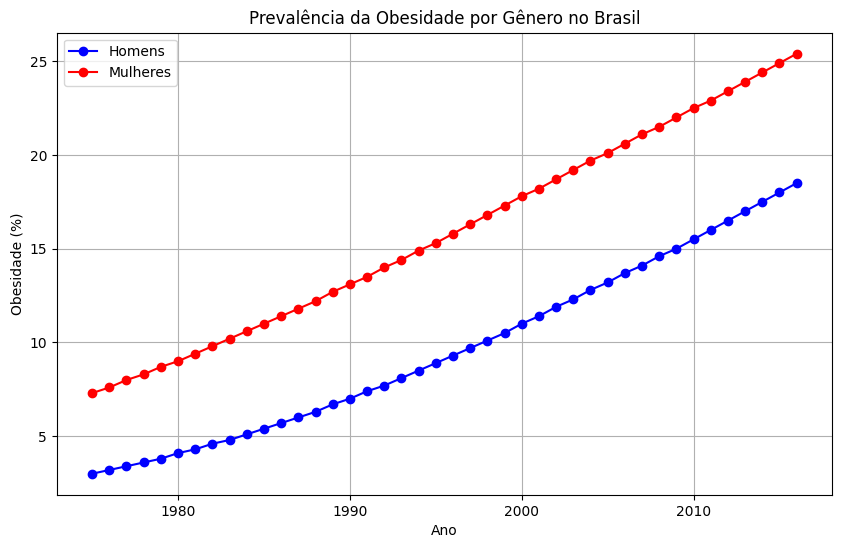

In [1542]:
# Plotar gráficos de obesidade por gênero
plt.figure(figsize=(10, 6))
plt.plot(df_brasil_male['Year'], df_brasil_male['Obesity no interval'], marker='o', color='blue', label='Homens')
plt.plot(df_brasil_female['Year'], df_brasil_female['Obesity no interval'], marker='o', color='red', label='Mulheres')
plt.title('Prevalência da Obesidade por Gênero no Brasil')
plt.xlabel('Ano')
plt.ylabel('Obesidade (%)')
plt.legend()
plt.grid(True)
plt.show()

In [1543]:
# Calcular a diferença de obesidade entre homens e mulheres para cada ano
df_diferencas = pd.DataFrame()
df_diferencas['Year'] = df_brasil_male['Year']  # Definir os anos como a primeira coluna

# Calcular a diferença de obesidade masculina e feminina para cada ano
df_diferencas['Diferenca_obesidade'] = df_brasil_female['Obesity no interval'].values - df_brasil_male['Obesity no interval'].values

# Contar os casos onde o percentual de obesidade feminina ultrapassa a masculina
casos_positivos = (df_diferencas['Diferenca_obesidade'] > 0).sum()

porcentagem_a_comparar = 50

if 100*(casos_positivos / len(df_diferencas.index)) > porcentagem_a_comparar:
  print('Há mais mulheres obesas do que homens.')
else:
  print('Há mais homens obesos do que mulheres.')

Há mais mulheres obesas do que homens.


#### Prever a tendência de comportamento para os próximos 10 anos
Para isso, podemos usar redes neurais

In [1544]:
import tensorflow as tf

# Dados históricos de obesidade feminina
anos = np.array(df_brasil_female['Year']).reshape(-1, 1)  # Anos como matriz de uma coluna
obesidade = np.array(df_brasil_female['Obesity no interval'])  # Taxa de obesidade feminina

# Normalizar os dados
anos_norm = (anos - anos.min()) / (anos.max() - anos.min())
obesidade_norm = (obesidade - obesidade.min()) / (obesidade.max() - obesidade.min())

# Construir o modelo
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

# Compilar o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinar o modelo
model.fit(anos_norm, obesidade_norm, epochs=1000, verbose=0)

# Prever a obesidade feminina para os próximos 10 anos
proximos_anos = np.arange(2017, 2027).reshape(-1, 1)  # Próximos 10 anos
proximos_anos_norm = (proximos_anos - anos.min()) / (anos.max() - anos.min())  # Normalizar os próximos anos
previsao_obesidade_norm = model.predict(proximos_anos_norm).flatten()  # Previsão da obesidade normalizada
previsao_obesidade = previsao_obesidade_norm * (obesidade.max() - obesidade.min()) + obesidade.min()  # Desnormalizar a previsão

# Exibir as previsões
print("Previsão da obesidade feminina para os próximos 10 anos:")
for ano, previsao in zip(proximos_anos.flatten(), previsao_obesidade):
    print("Ano:", ano, "Previsão:", previsao)

1/1 [==============================] - 0s 259ms/step
Previsão da obesidade feminina para os próximos 10 anos:
Ano: 2017 Previsão: 25.585743
Ano: 2018 Previsão: 26.038723
Ano: 2019 Previsão: 26.48999
Ano: 2020 Previsão: 26.941257
Ano: 2021 Previsão: 27.39252
Ano: 2022 Previsão: 27.843788
Ano: 2023 Previsão: 28.295052
Ano: 2024 Previsão: 28.746319
Ano: 2025 Previsão: 29.197586
Ano: 2026 Previsão: 29.64885


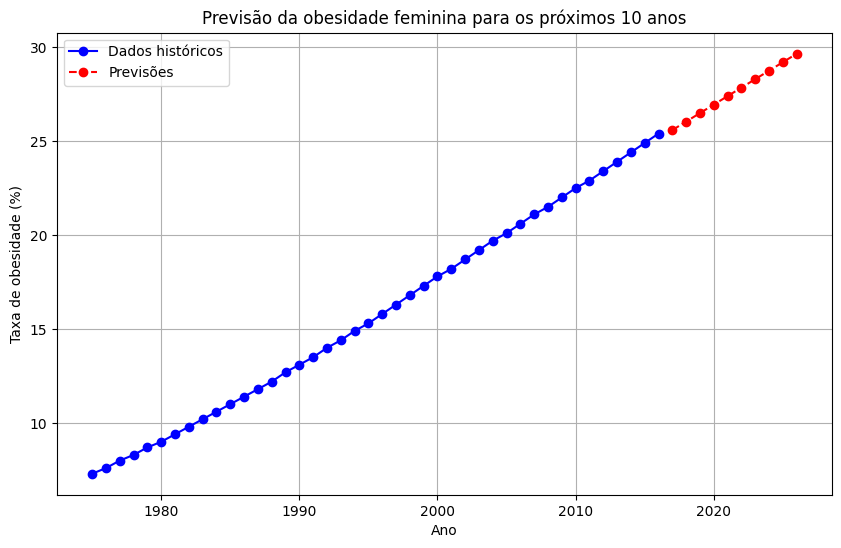

In [1545]:
# Plotar o gráfico das previsões
plt.figure(figsize=(10, 6))
plt.plot(anos, obesidade, marker='o', linestyle='-', color='blue', label='Dados históricos')
plt.plot(proximos_anos, previsao_obesidade, marker='o', linestyle='--', color='red', label='Previsões')
plt.title('Previsão da obesidade feminina para os próximos 10 anos')
plt.xlabel('Ano')
plt.ylabel('Taxa de obesidade (%)')
plt.legend()
plt.grid(True)
plt.show()

#Sobre PIB Per Capita

## Abrindo o DataSet PIB Per Capita

In [1546]:
df_pib_per_capita = pd.read_csv('/content/drive/MyDrive/DataSetADBD/PIB-Per-Capita.csv', sep = ',')
df_pib_per_capita

,Country,Region,Year,GDP_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1921,662.40
...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1/1/1991,782.09
4415,Zimbabwe,Sub-Saharan Africa,1/1/1996,781.50
4416,Zimbabwe,Sub-Saharan Africa,1/1/2001,719.96
4417,Zimbabwe,Sub-Saharan Africa,1/1/2006,520.17


## Limpeza de dados

In [1547]:
df_pib_per_capita['Year'].dtype

dtype('O')

In [1548]:
# Extrair apenas o ano da coluna 'Year' e converter para int
df_pib_per_capita['Year'] = df_pib_per_capita['Year'].str.extract('(\d{4})').astype(int)

In [1549]:
df_pib_per_capita

,Country,Region,Year,GDP_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40
...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1991,782.09
4415,Zimbabwe,Sub-Saharan Africa,1996,781.50
4416,Zimbabwe,Sub-Saharan Africa,2001,719.96
4417,Zimbabwe,Sub-Saharan Africa,2006,520.17


In [1550]:
#Remover os registros anteriores a 1975
df_pib_per_capita = df_pib_per_capita.query('Year >= 1975')

In [1551]:
df_pib_per_capita

,Country,Region,Year,GDP_pp
15,Afghanistan,"Middle East, North Africa, and Greater Arabia",1976,866.19
16,Afghanistan,"Middle East, North Africa, and Greater Arabia",1981,896.86
17,Afghanistan,"Middle East, North Africa, and Greater Arabia",1986,"1,030.89"
18,Afghanistan,"Middle East, North Africa, and Greater Arabia",1991,705.45
19,Afghanistan,"Middle East, North Africa, and Greater Arabia",1996,617.91
...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1991,782.09
4415,Zimbabwe,Sub-Saharan Africa,1996,781.50
4416,Zimbabwe,Sub-Saharan Africa,2001,719.96
4417,Zimbabwe,Sub-Saharan Africa,2006,520.17


## Os dados estão separados de 5 em 5 anos. Adapte preenchendo os anos vazios.
>Dica: faça uma média entre um valor e outro, dívida por 5, e interpole esses valores.

In [1552]:
print(df_pib_per_capita.columns) #Inicialmente, ver quais sao as colunas

Index(['Country', 'Region', 'Year', ' GDP_pp '], dtype='object')


In [1553]:
df_pib_per_capita[' GDP_pp '].dtype #Precisamos converter a coluna do valor do PIB per capita em float

dtype('O')

In [1554]:
# Garantir que a coluna ' GDP_pp ' esteja no formato float
df_pib_per_capita[' GDP_pp '] = df_pib_per_capita[' GDP_pp '].str.replace(',', '').astype(float)

<ipython-input-1554-76c92903c25a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pib_per_capita[' GDP_pp '] = df_pib_per_capita[' GDP_pp '].str.replace(',', '').astype(float)


In [1555]:
# Função para interpolar valores de PIB per capita e preencher anos ausentes
def interpolate_gdp(group):
    # Criar um DataFrame com todos os anos no intervalo desejado
    all_years = pd.DataFrame({'Year': range(group['Year'].min(), 2017)})
    # Fazer o merge com os dados do grupo para garantir todos os anos
    group = pd.merge(all_years, group, how='left', on='Year')
    # Preencher colunas 'Country' e 'Region' com valores corretos
    group['Country'] = group['Country'].fillna(method='ffill').fillna(method='bfill')
    group['Region'] = group['Region'].fillna(method='ffill').fillna(method='bfill')
    # Preencher os valores ausentes usando interpolação linear
    group[' GDP_pp '] = group[' GDP_pp '].interpolate(method='linear')
    return group

In [1556]:
# Aplicar a interpolação para cada país
df_pib_per_capita = df_pib_per_capita.groupby('Country').apply(interpolate_gdp).reset_index(drop=True)

In [1557]:
df_pib_per_capita

,Year,Country,Region,GDP_pp
0,1976,Afghanistan,"Middle East, North Africa, and Greater Arabia",866.190
1,1977,Afghanistan,"Middle East, North Africa, and Greater Arabia",872.324
2,1978,Afghanistan,"Middle East, North Africa, and Greater Arabia",878.458
3,1979,Afghanistan,"Middle East, North Africa, and Greater Arabia",884.592
4,1980,Afghanistan,"Middle East, North Africa, and Greater Arabia",890.726
...,...,...,...,...
7893,2012,Zimbabwe,Sub-Saharan Africa,526.330
7894,2013,Zimbabwe,Sub-Saharan Africa,526.330
7895,2014,Zimbabwe,Sub-Saharan Africa,526.330
7896,2015,Zimbabwe,Sub-Saharan Africa,526.330


In [1558]:
#Se os dados de entrada não tiverem valores diferentes para interpolar, a interpolação linear não poderá produzir novos valores.
df_pib_per_capita[(df_pib_per_capita['Country'] == 'Brazil') & (df_pib_per_capita['Year'] >= 2010)]

,Year,Country,Region,GDP_pp
977,2010,Brazil,South America,10074.942
978,2011,Brazil,South America,10383.070
979,2012,Brazil,South America,10383.070
980,2013,Brazil,South America,10383.070
981,2014,Brazil,South America,10383.070
982,2015,Brazil,South America,10383.070
983,2016,Brazil,South America,10383.070


### Plot um gráfico

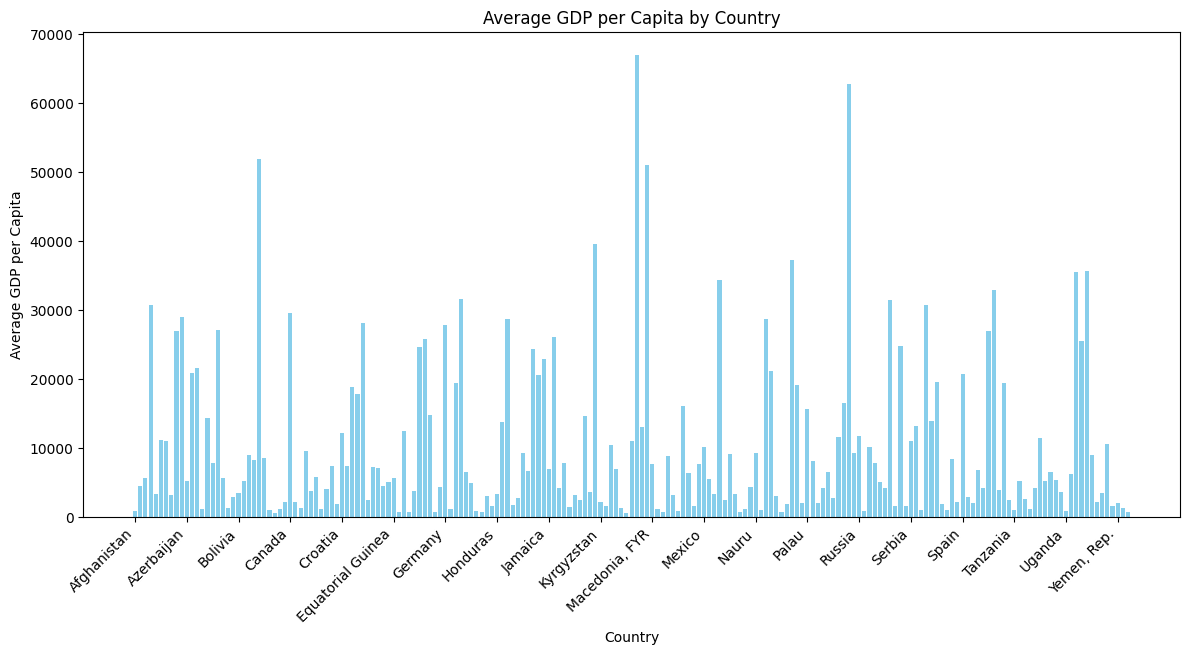

In [1559]:
# Calcular a média do PIB per capita para cada país
mean_gdp_per_capita = df_pib_per_capita.groupby('Country')[' GDP_pp '].mean()

# Resetar o índice para transformar 'Country' em uma coluna
mean_gdp_per_capita = mean_gdp_per_capita.reset_index()

# Plotar o gráfico de barras
plt.figure(figsize=(12, 8))
bars = plt.bar(mean_gdp_per_capita['Country'], mean_gdp_per_capita[' GDP_pp '], color='skyblue')

plt.xlabel('Country')
plt.ylabel('Average GDP per Capita')
plt.title('Average GDP per Capita by Country')

plt.xticks(rotation=90)  # Rotacionar os rótulos dos países para melhor visualização
plt.tight_layout()  # Ajustar o layout para evitar cortes nos nomes dos países

# Ajustar os rótulos dos países de forma escalonada
plt.gca().set_xticks(mean_gdp_per_capita['Country'][::10])
plt.gca().set_xticklabels(mean_gdp_per_capita['Country'][::10], rotation=45, ha='right')

plt.show()

Exibição dos rótulos dos países de forma escalonada, exibindo apenas cada décimo país. Isso ajuda a evitar a sobreposição de rótulos e melhora a legibilidade do gráfico.

### Informe as regiões de maiores crescimentos de PIB. Use gráficos para finalizar a resposta.

In [1560]:
df_pib_per_capita['Region'].value_counts() #Exibindo quais são as regiões do PIB per capita.

Region
Europe                                           1912
Sub-Saharan Africa                               1886
Asia                                             1107
Middle East, North Africa, and Greater Arabia     943
Central America and the Caribbean                 779
Australia and Oceania                             615
South America                                     492
North America                                     164
Name: count, dtype: int64

In [1561]:
df_pib_per_capita.columns

Index(['Year', 'Country', 'Region', ' GDP_pp '], dtype='object')

1. **Calcular a variação do PIB per capita por região ao longo do tempo**: Para isso, precisamos agrupar os dados por região e ano, calcular a média do PIB per capita por ano para cada região e, em seguida, calcular a variação do PIB per capita ao longo do tempo.
2. **Identificar as regiões com maiores crescimentos**: Com a variação calculada, podemos identificar as regiões com os maiores crescimentos.

In [1562]:
# Calcular a média do PIB per capita por ano para cada região
df_mean_gdp = df_pib_per_capita.groupby(['Region', 'Year'])[' GDP_pp '].mean().reset_index()

In [1563]:
# Pivotar os dados para ter os anos como colunas e as regiões como linhas
df_pivot = df_mean_gdp.pivot(index='Region', columns='Year', values=' GDP_pp ')

In [1564]:
# Calcular a variação percentual do PIB per capita
growth = df_pivot.pct_change(axis='columns') * 100

# Calcular a média da variação percentual ao longo dos anos para cada região
average_growth = growth.mean(axis=1)

# Identificar as regiões com maiores crescimentos
top_regions = average_growth.sort_values(ascending=False)

In [1565]:
print("Crescimento médio anual de cada região\n", top_regions)

Crescimento médio anual de cada região
 Region
Asia                                             1.603935
Central America and the Caribbean                1.518511
Europe                                           1.412699
North America                                    1.306317
South America                                    1.108828
Sub-Saharan Africa                               0.865405
Australia and Oceania                            0.192678
Middle East, North Africa, and Greater Arabia    0.040945
dtype: float64


In [1566]:
# Encontrar o primeiro e o último ano do DataFrame
first_year = df_pib_per_capita['Year'].min()
last_year = df_pib_per_capita['Year'].max()

# Filtrar os dados para o primeiro e o último ano
df_first_year = df_pib_per_capita[df_pib_per_capita['Year'] == first_year]
df_last_year = df_pib_per_capita[df_pib_per_capita['Year'] == last_year]

# Calcular a média do PIB per capita no primeiro e no último ano para cada região
gdp_first_year = df_first_year.groupby('Region')[' GDP_pp '].mean()
gdp_last_year = df_last_year.groupby('Region')[' GDP_pp '].mean()

# Calcular o crescimento percentual geral
growth_general = ((gdp_last_year - gdp_first_year) / gdp_first_year) * 100

# Ordenar as regiões pelo crescimento percentual geral
growth_general_sorted = growth_general.sort_values(ascending=False)

print("Crescimento geral das regiões:\n", growth_general_sorted)

Crescimento geral das regiões:
 Region
Asia                                             88.593391
Central America and the Caribbean                82.268357
Europe                                           74.764214
North America                                    67.677984
South America                                    54.625550
Sub-Saharan Africa                               40.614277
Australia and Oceania                             7.482835
Middle East, North Africa, and Greater Arabia     0.383376
Name:  GDP_pp , dtype: float64


#### Gráfico para mostrar o crescimento/descrescimento do PIB *per capita* de cada região

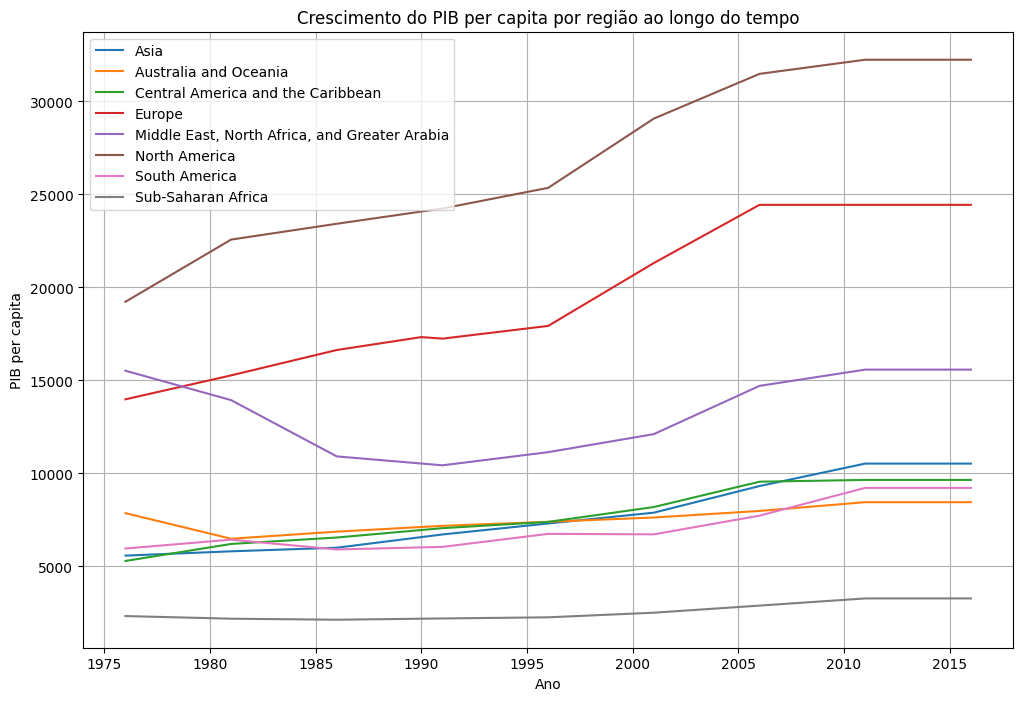

In [1567]:
# Plotar o gráfico
plt.figure(figsize=(12, 8))
for region in df_mean_gdp['Region'].unique():
    region_data = df_mean_gdp[df_mean_gdp['Region'] == region]
    plt.plot(region_data['Year'], region_data[' GDP_pp '], label=region)

plt.title('Crescimento do PIB per capita por região ao longo do tempo')
plt.xlabel('Ano')
plt.ylabel('PIB per capita')
plt.legend()
plt.grid(True)
plt.show()

## Quanto mais rico, mais obeso?

In [1568]:
#df_rel = [df_pib_per_capita[' GDP_pp '],

Primeiramente, os países estão com grafias distintas

In [1569]:
df_obesidade['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica',
       'Croatia', 'Cuba', 'Cyprus', 'Czechia', "Côte d'Ivoire",
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia

In [1570]:
df_pib_per_capita['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo, Rep.', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Rep.',
       'Denmark', 'Djibouti', 'Dominica', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland', 'Grenada',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran'

Devemos criar um dicionário de mapeamento para mapear as grafias dos países de um dataset para o outro.


In [1571]:
# Dicionário de mapeamento
country_mapping = {
    'Bolivia (Plurinational State of)': 'Bolivia',
    'Cape Verde': 'Cabo Verde',
    'Czechia': 'Czech Rep.',
    "Democratic People's Republic of Korea": 'Korea, Dem. Rep.',
    'Republic of Korea': 'Korea, Rep.',
    "Côte d'Ivoire": "Cote d'Ivoire",
    'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
    'United States of America': 'United States',
    'Venezuela (Bolivarian Republic of)': 'Venezuela',
    'Viet Nam': 'Vietnam',
    'Syrian Arab Republic': 'Syria',
    'Iran (Islamic Republic of)': 'Iran'
}


2. Substituição dos Nomes dos Países

In [1572]:
# Substituir os nomes dos países no dataset de obesidade
df_obesidade['Country'] = df_obesidade['Country'].replace(country_mapping)

# Substituir os nomes dos países no dataset de PIB per capita (se necessário)
df_pib_per_capita['Country'] = df_pib_per_capita['Country'].replace(country_mapping)

3. Filtragem e Mesclagem dos Dados

In [1573]:
# Filtrar o dataframe de obesidade para incluir apenas 'Both Sexes'
df_obesidade_both_sexes = df_obesidade[df_obesidade['Sex'] == 'Both sexes']

# Selecionar as colunas desejadas dos dataframes
df_obesidade_filtered = df_obesidade_both_sexes[['Country', 'Year', 'Obesity no interval']]
df_pib_filtered = df_pib_per_capita[['Country', 'Year', 'Region', ' GDP_pp ']]

# Mesclar os dataframes com base nas colunas 'Country' e 'Year'
df_combined = pd.merge(df_obesidade_filtered, df_pib_filtered, on=['Country', 'Year'], how='inner')

In [1574]:
df_combined

,Country,Year,Obesity no interval,Region,GDP_pp
0,Afghanistan,1976,0.5,"Middle East, North Africa, and Greater Arabia",866.190
1,Afghanistan,1977,0.6,"Middle East, North Africa, and Greater Arabia",872.324
2,Afghanistan,1978,0.6,"Middle East, North Africa, and Greater Arabia",878.458
3,Afghanistan,1979,0.6,"Middle East, North Africa, and Greater Arabia",884.592
4,Afghanistan,1980,0.7,"Middle East, North Africa, and Greater Arabia",890.726
...,...,...,...,...,...
7293,Zimbabwe,2012,14.3,Sub-Saharan Africa,526.330
7294,Zimbabwe,2013,14.6,Sub-Saharan Africa,526.330
7295,Zimbabwe,2014,14.9,Sub-Saharan Africa,526.330
7296,Zimbabwe,2015,15.2,Sub-Saharan Africa,526.330


In [1575]:
# Calcular a média do PIB per capita e obesidade por região ou país
mean_data = df_combined.groupby(['Region', 'Country']).mean()

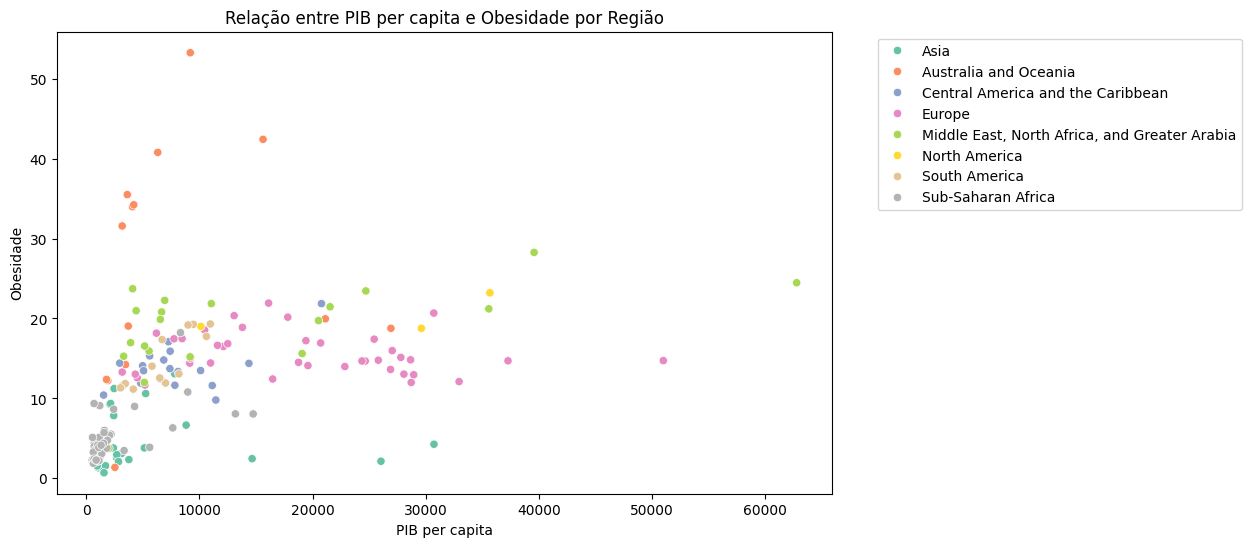

In [1576]:
# Plotar um gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mean_data, x=' GDP_pp ', y='Obesity no interval', hue='Region', palette='Set2')
plt.xlabel('PIB per capita')
plt.ylabel('Obesidade')
plt.title('Relação entre PIB per capita e Obesidade por Região')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [1577]:
# Calcular a correlação entre PIB per capita e obesidade
correlation = mean_data[' GDP_pp '].corr(mean_data['Obesity no interval'])
print("Correlação entre PIB per capita e obesidade:", correlation)

Correlação entre PIB per capita e obesidade: 0.38801423266162666


Uma correlação de 0.388 sugere uma correlação positiva moderada entre o PIB per capita e a obesidade. Isso significa que há uma tendência de que países com um PIB per capita mais alto também tenham níveis mais altos de obesidade. No entanto, a correlação não é muito forte, o que significa que outros fatores também podem influenciar os níveis de obesidade em um país. Portanto, podemos dizer que a afirmação "Quanto mais rico, mais obeso" tem algum suporte com base nos dados, mas a relação não é tão forte e outros fatores também devem ser considerados.

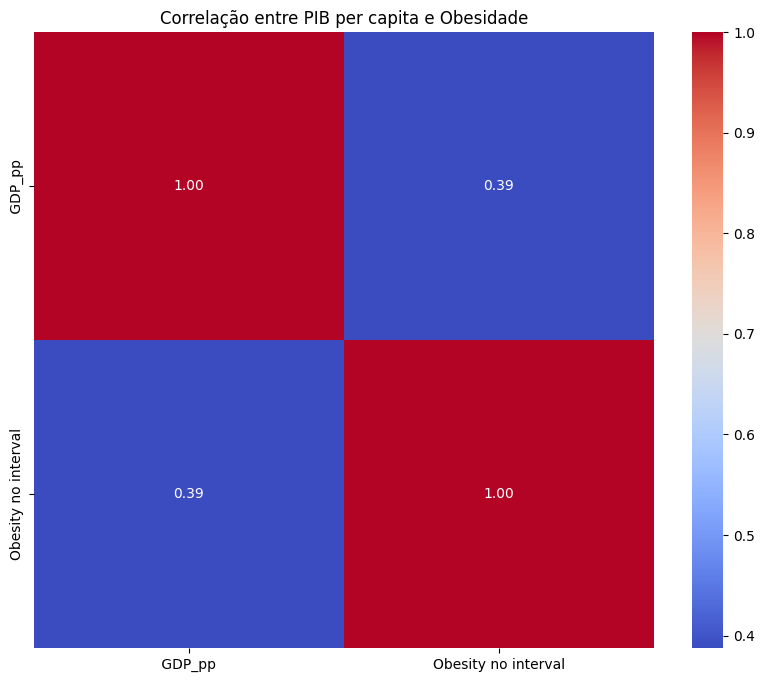

In [1578]:
# Gráfico de calor com a correlação entre PIB per capita e obesidade
plt.figure(figsize=(10, 8))
sns.heatmap(df_combined[[' GDP_pp ', 'Obesity no interval']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação entre PIB per capita e Obesidade')
plt.show()

## O resultado em 1 é o mesmo no Brasil? Qual a diferença entre Brasil, USA e Portugal?

In [1579]:
# Filtrar os dados para Brasil, USA e Portugal
countries_of_interest = ['Brazil', 'United States', 'Portugal']
df_filtered = df_combined[df_combined['Country'].isin(countries_of_interest)]

In [1580]:
# Função para calcular a correlação entre PIB per capita e obesidade para um país específico
def calculate_correlation(df, country):
    df_country = df[df['Country'] == country]
    correlation = df_country[' GDP_pp '].corr(df_country['Obesity no interval'])
    return correlation

In [1581]:
# Calcular a correlação para Brasil, EUA e Portugal
correlation_brazil = calculate_correlation(df_filtered, 'Brazil')
correlation_usa = calculate_correlation(df_filtered, 'United States')
correlation_portugal = calculate_correlation(df_filtered, 'Portugal')

# Exibir os resultados
print(f"Correlação entre PIB per capita e obesidade no Brasil: {correlation_brazil}")
print(f"Correlação entre PIB per capita e obesidade nos EUA: {correlation_usa}")
print(f"Correlação entre PIB per capita e obesidade em Portugal: {correlation_portugal}")

Correlação entre PIB per capita e obesidade no Brasil: 0.9450864435203971
Correlação entre PIB per capita e obesidade nos EUA: 0.9689349149588301
Correlação entre PIB per capita e obesidade em Portugal: 0.9373921887608112


In [1582]:
# Analisar os resultados
differences = {
    "Brasil vs EUA": correlation_brazil - correlation_usa,
    "Brasil vs Portugal": correlation_brazil - correlation_portugal,
    "EUA vs Portugal": correlation_usa - correlation_portugal
}

print("Diferenças de correlação:")
for comparison, difference in differences.items():
    print(f"{comparison}: {difference}")

Diferenças de correlação:
Brasil vs EUA: -0.02384847143843305
Brasil vs Portugal: 0.00769425475958585
EUA vs Portugal: 0.0315427261980189


1.   A relação entre PIB per capita e obesidade é ligeiramente mais forte nos EUA do que no Brasil.
2.   A relação entre PIB per capita e obesidade é ligeiramente mais forte no Brasil do que em Portugal, mas a diferença é muito pequena.
3.   A relação entre PIB per capita e obesidade é um pouco mais forte nos EUA do que em Portugal.





<Figure size 1000x600 with 0 Axes>

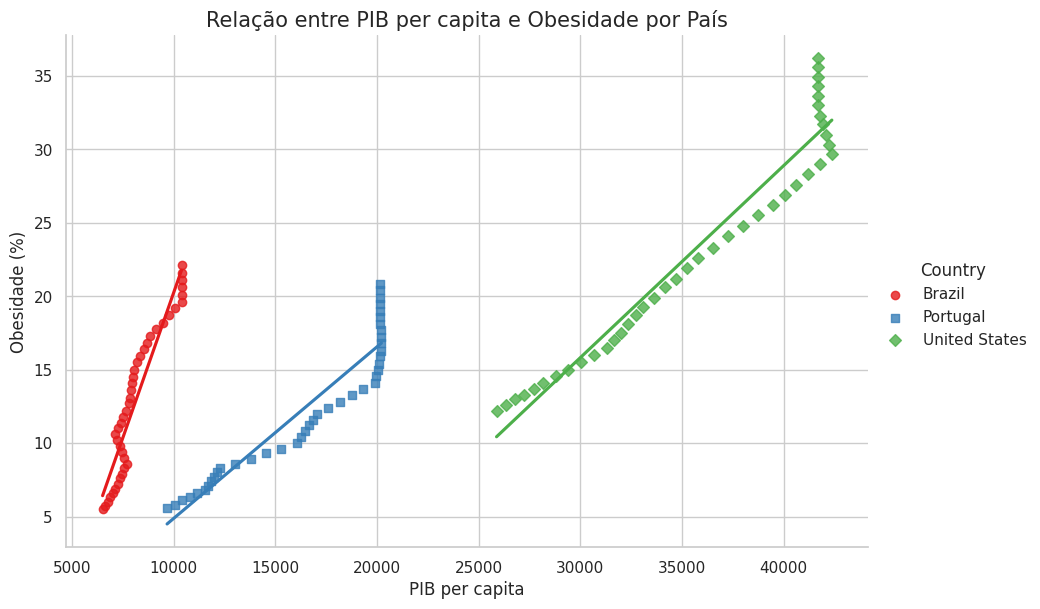

In [1586]:
# Configurar o estilo dos gráficos
sns.set(style="whitegrid")

# Criar o gráfico de dispersão com linhas de regressão
plt.figure(figsize=(10, 6))
scatter_plot = sns.lmplot(
    data=df_filtered,
    x=' GDP_pp ',
    y='Obesity no interval',
    hue='Country',
    ci=None,  # Remove o intervalo de confiança para as linhas de regressão
    height=6,
    aspect=1.5,
    markers=['o', 's', 'D'],  # Diferentes marcadores para cada país
    palette='Set1'  # Paleta de cores para diferenciar os países
)

# Ajustar o título e os rótulos dos eixos
plt.title('Relação entre PIB per capita e Obesidade por País', fontsize=15)
plt.xlabel('PIB per capita', fontsize=12)
plt.ylabel('Obesidade (%)', fontsize=12)

# Mostrar o gráfico
plt.show()

Ao analisar as diferenças entre Brasil, Estados Unidos e Portugal em relação à correlação entre PIB per capita e obesidade, podemos destacar algumas possíveis razões para as discrepâncias nos resultados:

1. **Contexto Socioeconômico**:
   - Cada país possui um contexto socioeconômico único, com diferentes níveis de desenvolvimento econômico, distribuição de renda, acesso a serviços de saúde e políticas públicas relacionadas à alimentação e estilo de vida. Essas diferenças podem influenciar a relação entre PIB per capita e obesidade.

2. **Hábitos Alimentares e Estilo de Vida**:
   - Os hábitos alimentares e o estilo de vida variam entre os países. Por exemplo, o padrão alimentar tradicional pode diferir significativamente entre o Brasil, os Estados Unidos e Portugal, afetando os índices de obesidade em cada país.

3. **Políticas de Saúde Pública e Prevenção**:
   - As políticas de saúde pública e prevenção da obesidade também podem ser diferentes em cada país. Isso inclui iniciativas governamentais relacionadas à educação nutricional, acesso a alimentos saudáveis, restrições à publicidade de alimentos não saudáveis, promoção da atividade física, entre outros.

4. **Cultura e Percepções Sociais**:
   - A cultura e as percepções sociais em relação à alimentação, imagem corporal e saúde podem variar entre os países. Por exemplo, atitudes em relação ao peso corporal, dietas da moda e estigma associado à obesidade podem influenciar os padrões de obesidade em cada país.

5. **Estrutura Demográfica**:
   - As características demográficas de cada país, como idade, gênero, etnia e composição populacional, podem influenciar os padrões de obesidade e sua relação com o PIB per capita.